<a href="https://colab.research.google.com/github/roahalejandro/ProyectoDS_/blob/main/Proyecto_Final_Roa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Proyecto Data Science – Profesionales de Medicina en Argentina

  **1. Definición del Proyecto y Abstract**

En este proyecto exploramos la serie histórica de profesionales médicos registrados en Argentina entre 2012 y 2021, provista por el Ministerio de Salud. Este dataset permite analizar la composición del cuerpo médico, incluyendo nacionalidad, provincia de residencia, grupo etario, institución de formación y año de titulación.

El análisis busca identificar tendencias en la incorporación de profesionales, diferencias entre médicos nacidos en Argentina y en el exterior, y su distribución geográfica y etaria. Como objetivo de más largo plazo, se evaluará la posibilidad de comparar este modelo con otros países para entender la atracción o retención de talento médico.

Mediante técnicas de análisis exploratorio (EDA) y visualizaciones en Python (pandas, seaborn, matplotlib), se realizará un diagnóstico visual y cuantitativo que siente las bases para una segunda etapa de estudio comparativo o predictivo.



  **2. Preguntas / Hipótesis de interés**

¿Cuál es la evolución anual de médicos con matrícula activa en Argentina?

¿Qué proporción de médicos activos son nacidos en el exterior?

¿Cuáles son las provincias con mayor y menor densidad de médicos?

¿Hay diferencias de edad o año de titulación entre profesionales nacionales y extranjeros?

¿Qué universidades (o instituciones formadoras) concentran la mayor parte de la formación médica?

¿Se puede detectar una tendencia de dependencia de profesionales extranjeros?


**3.Carga y exploración de datos**

  - Conexión a Google Drive
  - Lectura del dataset  
  - Revisión de estructura y primeras filas  
  - Limpieza inicial de nombres de columnas  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ruta = "https://docs.google.com/spreadsheets/d/1r2z1_jtRrCyv6wZqbt_Go0HaxErYSWtsxOap_umhz_0/edit?usp=drive_link"


In [ ]:
import pandas as pd

ruta = "/content/drive/MyDrive/CODERHOUSE/Data Science I/profesionales_de_medicina_2012_2021.csv"

df = pd.read_csv(ruta, sep=",", low_memory=False, encoding="utf-8")
df.head()

,sexo,grupo_etario,id_provincia_residencia,provincia_residencia,id_pais_nacimiento,pais_nacimiento,pais_origen,id_profesion_referencia,profesion_referencia,id_institucion_formadora,institucion_formadora,anio_titulo,total,anio_corte
0,F,80-84,2,Ciudad Autónoma de Buenos Aires,9999,Sin Datos,Sin Datos,35,Médico,1172,UNIVERSIDAD DE BUENOS AIRES,1954,1,2012
1,F,75-79,2,Ciudad Autónoma de Buenos Aires,9999,Sin Datos,Sin Datos,35,Médico,1172,UNIVERSIDAD DE BUENOS AIRES,1959,1,2012
2,F,75-79,2,Ciudad Autónoma de Buenos Aires,9999,Sin Datos,Sin Datos,35,Médico,1172,UNIVERSIDAD DE BUENOS AIRES,1963,1,2012
3,F,75-79,2,Ciudad Autónoma de Buenos Aires,9999,Sin Datos,Sin Datos,35,Médico,1172,UNIVERSIDAD DE BUENOS AIRES,1965,1,2012
4,F,70-74,2,Ciudad Autónoma de Buenos Aires,9999,Sin Datos,Sin Datos,35,Médico,1172,UNIVERSIDAD DE BUENOS AIRES,1967,1,2012


In [ ]:
df.info(memory_usage="deep")

print("\nForma del dataset:", df.shape)

print("\nColumnas del dataset:")
print(df.columns.tolist())

df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454556 entries, 0 to 454555
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   sexo                      454556 non-null  object
 1   grupo_etario              454556 non-null  object
 2   id_provincia_residencia   454556 non-null  int64 
 3   provincia_residencia      454556 non-null  object
 4   id_pais_nacimiento        454556 non-null  int64 
 5   pais_nacimiento           454556 non-null  object
 6   pais_origen               454556 non-null  object
 7   id_profesion_referencia   454556 non-null  int64 
 8   profesion_referencia      454556 non-null  object
 9   id_institucion_formadora  454556 non-null  int64 
 10  institucion_formadora     454556 non-null  object
 11  anio_titulo               454556 non-null  int64 
 12  total                     454556 non-null  int64 
 13  anio_corte                454556 non-null  int64 
dtypes: i

,sexo,grupo_etario,id_provincia_residencia,provincia_residencia,id_pais_nacimiento,pais_nacimiento,pais_origen,id_profesion_referencia,profesion_referencia,id_institucion_formadora,institucion_formadora,anio_titulo,total,anio_corte
341497,M,60-64,18,Corrientes,200,Argentina,Argentina,35,Médico,1105,UNIVERSIDAD NACIONAL DE LA PLATA,1982,1,2019
283898,M,60-64,2,Ciudad Autónoma de Buenos Aires,222,Perú,Extranjero,35,Médico,1320,UNIVERSIDAD NACIONAL DE TUCUMAN,1986,1,2018
100300,M,65-69,2,Ciudad Autónoma de Buenos Aires,200,Argentina,Argentina,35,Médico,1199,UNIVERSIDAD NACIONAL DE CORDOBA,1975,4,2014
453243,M,40-44,86,Santiago del Estero,200,Argentina,Argentina,35,Médico,1199,UNIVERSIDAD NACIONAL DE CORDOBA,2013,1,2021
98787,F,35-39,86,Santiago del Estero,200,Argentina,Argentina,35,Médico,1199,UNIVERSIDAD NACIONAL DE CORDOBA,2005,1,2014


Detecto que la palabra "año", Python la escribio como "anio" debido que se reemplazan Ñ por NI para evitar problemas de codificación.


In [ ]:
df = df.rename(columns={"anio_corte": "año_corte", "anio_titulo": "año_titulo"})

print(df.columns)

Index(['sexo', 'grupo_etario', 'id_provincia_residencia',
       'provincia_residencia', 'id_pais_nacimiento', 'pais_nacimiento',
       'pais_origen', 'id_profesion_referencia', 'profesion_referencia',
       'id_institucion_formadora', 'institucion_formadora', 'año_titulo',
       'total', 'año_corte'],
      dtype='object')


**4.Análisis exploratorio (EDA)**

- Valores únicos por columna  
- Porcentaje de nulos  
- Distribuciones generales  

In [ ]:
print("Valores únicos por columna:\n")
for col in ["sexo", "grupo_etario", "provincia_residencia", "pais_nacimiento", "año_corte"]:
    print(f"{col}: {df[col].nunique()} valores únicos")

print("\nEjemplo de valores únicos:")
print("sexo:", df["sexo"].unique())
print("grupo_etario:", df["grupo_etario"].unique()[:10])
print("pais_nacimiento:", df["pais_nacimiento"].unique()[:10])

print("\nPorcentaje de valores nulos por columna:")
print(df.isna().mean().sort_values(ascending=False) * 100)

Valores únicos por columna:

sexo: 2 valores únicos
grupo_etario: 14 valores únicos
provincia_residencia: 24 valores únicos
pais_nacimiento: 92 valores únicos
año_corte: 10 valores únicos

Ejemplo de valores únicos:
sexo: ['F' 'M']
grupo_etario: ['80-84' '75-79' '70-74' '65-69' '60-64' '55-59' '85+' '50-54' '45-49'
 '35-39']
pais_nacimiento: ['Sin Datos' 'Argelia' 'Egipto' 'Marruecos' 'Mozambique' 'Argentina'
 'Bolivia' 'Brasil' 'Canadá' 'Colombia']

Porcentaje de valores nulos por columna:
sexo                        0.0
grupo_etario                0.0
id_provincia_residencia     0.0
provincia_residencia        0.0
id_pais_nacimiento          0.0
pais_nacimiento             0.0
pais_origen                 0.0
id_profesion_referencia     0.0
profesion_referencia        0.0
id_institucion_formadora    0.0
institucion_formadora       0.0
año_titulo                  0.0
total                       0.0
año_corte                   0.0
dtype: float64


El análisis exploratorio mostró cosas clave:

sexo: Femenino y Masculino

Grupo etario: 14 grupos

Provincia de Residencia: 24

Pais de Nacimiento: 92 países distintos (incluye "Argentina", "Sin Datos")

**5.Análisis específico según hipótesis**

 - **Distribución por nacionalidad (país de nacimiento / país de origen)**

1. Crear columna origen (Nacional / Extranjero / Desconocido)

Clasificamos la nacionalidad de los profesionales, para luego comparar entre los nacionales vs extranjeros.

2. Agrupar y analizar

Corroboramos la cantidad de profesionales inscriptos por año segun el origen del mismo.

3. Visualizacion evolución temporal

In [ ]:
df["origen"] = df["pais_nacimiento"].apply(
    lambda x: "Nacional" if x.strip().lower() == "argentina"
              else "Desconocido" if x.strip().lower() in ["sin datos", "9999"]
              else "Extranjero"
)

In [ ]:
conteo_origen = df.groupby(["año_corte", "origen"])["total"].sum().reset_index()
conteo_origen.head()

,año_corte,origen,total
0,2012,Desconocido,3308
1,2012,Extranjero,14593
2,2012,Nacional,185429
3,2013,Desconocido,3295
4,2013,Extranjero,15398


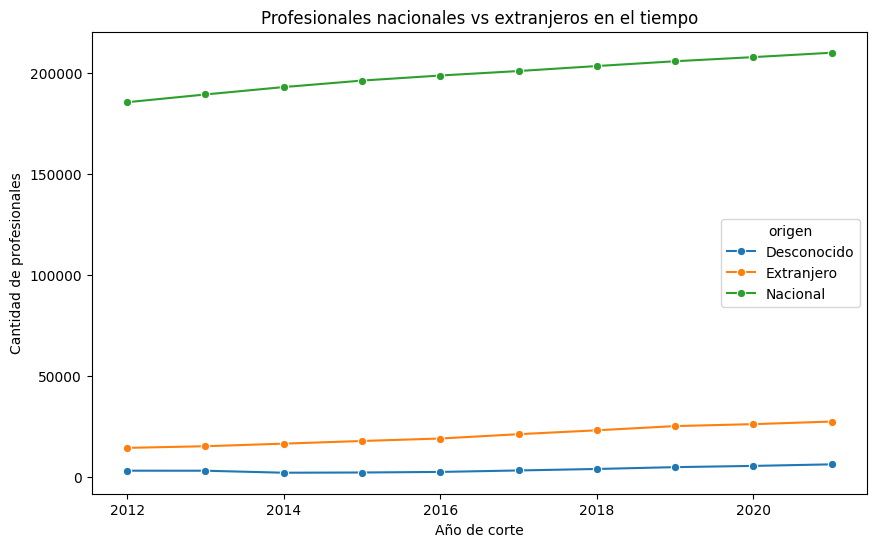

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.lineplot(data=conteo_origen, x="año_corte", y="total", hue="origen", marker="o")
plt.title("Profesionales nacionales vs extranjeros en el tiempo")
plt.ylabel("Cantidad de profesionales")
plt.xlabel("Año de corte")
plt.show()

- **Distribución por provincia**

Se realiza el análisis para ver cómo se distribuyen los profesionales nacionales vs extranjeros en cada provincia y si existen diferencias. Acompañado de un gráfico de barras horizontales, útil para ver rápidamente en qué provincias hay mayor proporción de extranjeros.

In [ ]:
conteo_provincia = (df.groupby(["provincia_residencia", "origen"])["total"]
.sum()
.reset_index()
.sort_values("total", ascending=False)
)
conteo_provincia.head()

,provincia_residencia,origen,total
2,Buenos Aires,Nacional,559061
14,Ciudad Autónoma de Buenos Aires,Nacional,498112
20,Córdoba,Nacional,189853
62,Santa Fe,Nacional,174760
13,Ciudad Autónoma de Buenos Aires,Extranjero,142248


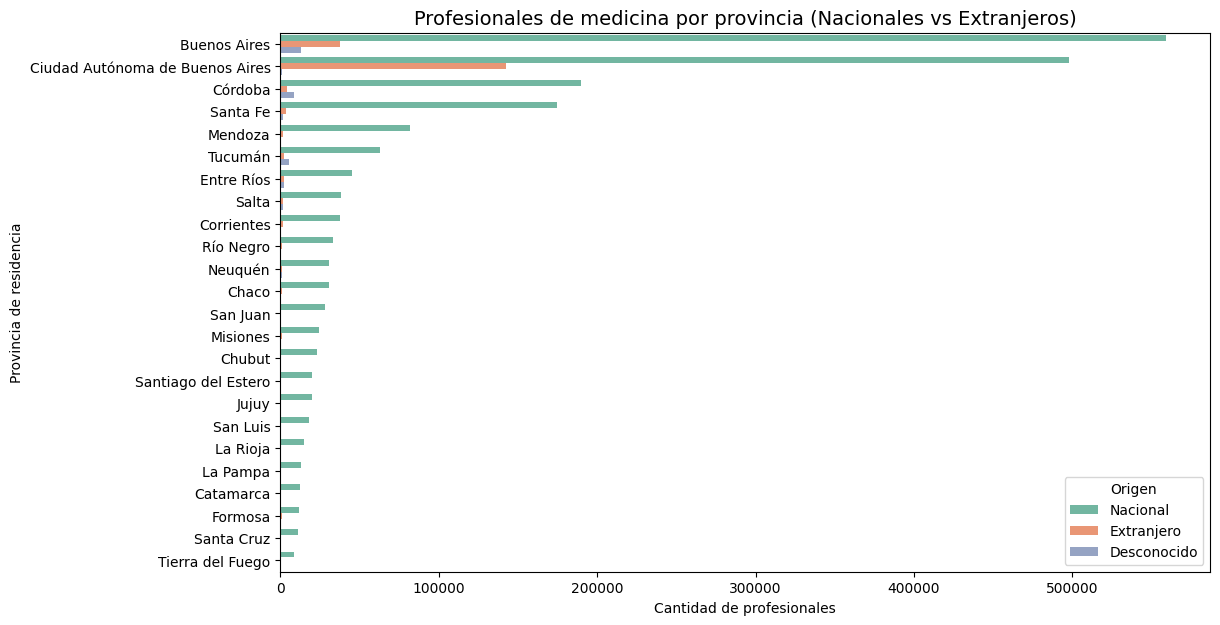

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,7))
sns.barplot(
    data=conteo_provincia,
    x="total",
    y="provincia_residencia",
    hue="origen",
    palette="Set2"
)
plt.title("Profesionales de medicina por provincia (Nacionales vs Extranjeros)", fontsize=14)
plt.xlabel("Cantidad de profesionales")
plt.ylabel("Provincia de residencia")
plt.legend(title="Origen")
plt.show()

- **Ranking de Provincias con mayor % de Extranjeros**

Se realiza un Top 10 de provincias con mayor proporción de extranjeros.

Para lo cual primero procedemos a obtener columnas Nacional / Extranjero, calcular el porcentaje de extranjeros por provincia y ordenar de mayor a menor.

In [ ]:
conteo_pct = (
    conteo_provincia
    .pivot(index="provincia_residencia", columns="origen", values="total")
    .fillna(0)
)

conteo_pct["%_extranjeros"] = (
    (conteo_pct["Extranjero"] / conteo_pct.sum(axis=1) * 100).round(2)
)

conteo_pct = conteo_pct.sort_values("%_extranjeros", ascending=False)
conteo_pct.head(10)

origen,Desconocido,Extranjero,Nacional,%_extranjeros
provincia_residencia,,,,
Ciudad Autónoma de Buenos Aires,1365,142248,498112,22.17
Formosa,33,1263,11737,9.69
Buenos Aires,12807,37576,559061,6.17
Tierra del Fuego,51,472,8914,5.00
Santa Cruz,97,586,11261,4.91
Misiones,439,1135,24426,4.37
Entre Ríos,2648,2049,45508,4.08
Corrientes,112,1583,37681,4.02
Salta,1792,1598,38337,3.83


/tmp/ipython-input-3484639256.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


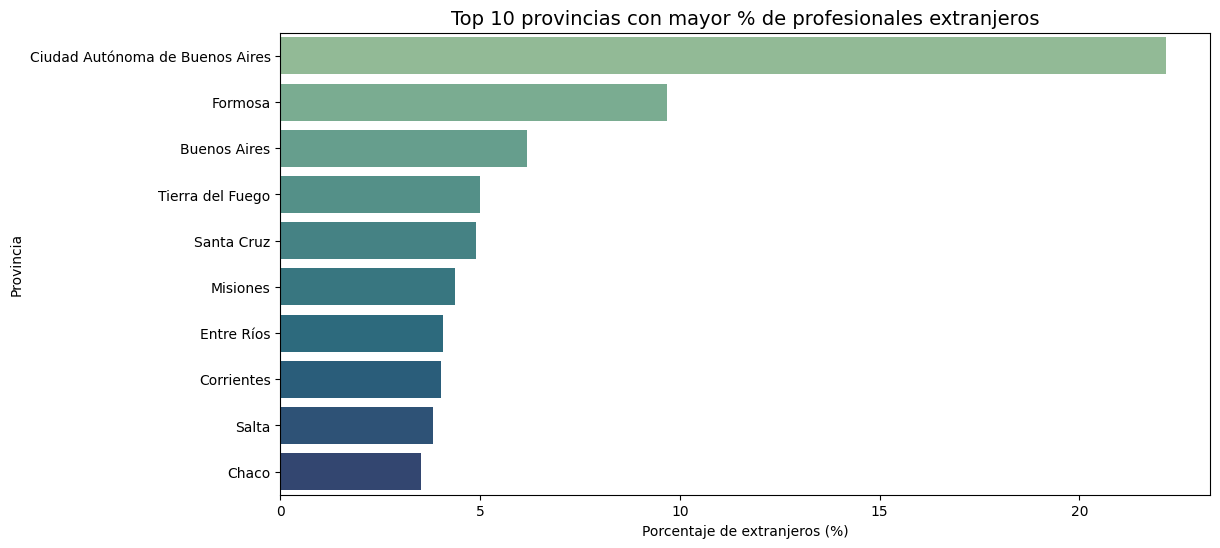

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=conteo_pct.reset_index().head(10),
    x="%_extranjeros",
    y="provincia_residencia",
    palette="crest"
)
plt.title("Top 10 provincias con mayor % de profesionales extranjeros", fontsize=14)
plt.xlabel("Porcentaje de extranjeros (%)")
plt.ylabel("Provincia")
plt.show()

-  **Evolucion proporción de profesionales extranjeros a lo largo del tiempo (2012–2021)**

Esto busca mostrar si la dependencia de médicos extranjeros en Argentina aumentó, se mantuvo o disminuyó a lo largo de los años de analisis.

Se agrupa por año de corte y origen, calculando % de extranjero para una mayor claritud.

In [ ]:
conteo_anual = (
    df.groupby(["año_corte", "origen"])["total"]
    .sum()
    .reset_index()
    .pivot(index="año_corte", columns="origen", values="total")
    .fillna(0)
)

conteo_anual["%_extranjeros"] = (conteo_anual["Extranjero"] / conteo_anual.sum(axis=1) * 100).round(2)

conteo_anual.head()

origen,Desconocido,Extranjero,Nacional,%_extranjeros
año_corte,,,,
2012,3308,14593,185429,7.18
2013,3295,15398,189264,7.40
2014,2306,16677,192919,7.87
2015,2415,17995,196123,8.31
2016,2700,19213,198626,8.71


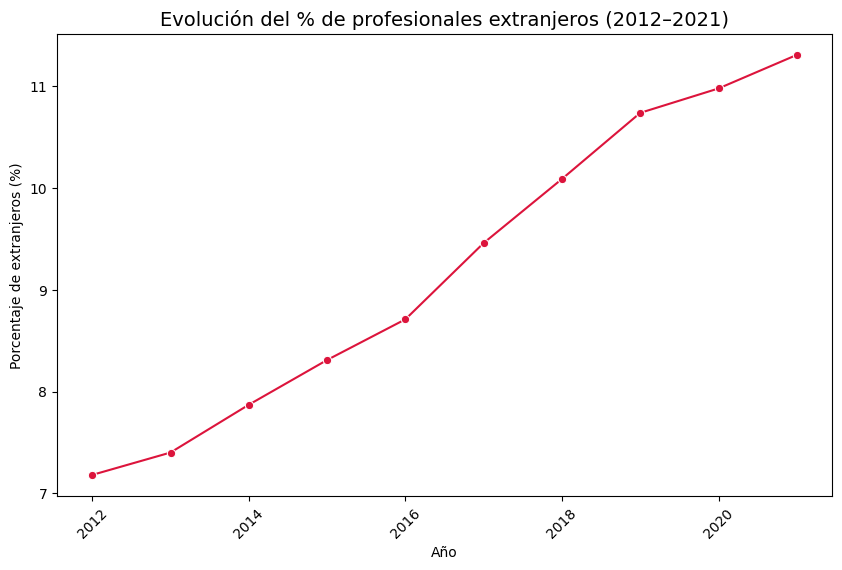

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(
    data=conteo_anual.reset_index(),
    x="año_corte",
    y="%_extranjeros",
    marker="o",
    color="crimson"
)
plt.title("Evolución del % de profesionales extranjeros (2012–2021)", fontsize=14)
plt.xlabel("Año")
plt.ylabel("Porcentaje de extranjeros (%)")
plt.xticks(rotation=45)
plt.show()

- **Composición etaria entre médicos nacionales y extranjeros**

Esto nos dará una idea de si los extranjeros tienden a ser más jóvenes, mayores, recién graduados, etc.

In [ ]:
conteo_edad = (
    df.groupby(["grupo_etario", "origen"])["total"]
    .sum()
    .reset_index()
    .sort_values("grupo_etario")
)
conteo_edad.head()

,grupo_etario,origen,total
0,20-24,Desconocido,1406
1,20-24,Extranjero,676
2,20-24,Nacional,8063
3,25-29,Desconocido,8693
4,25-29,Extranjero,16448


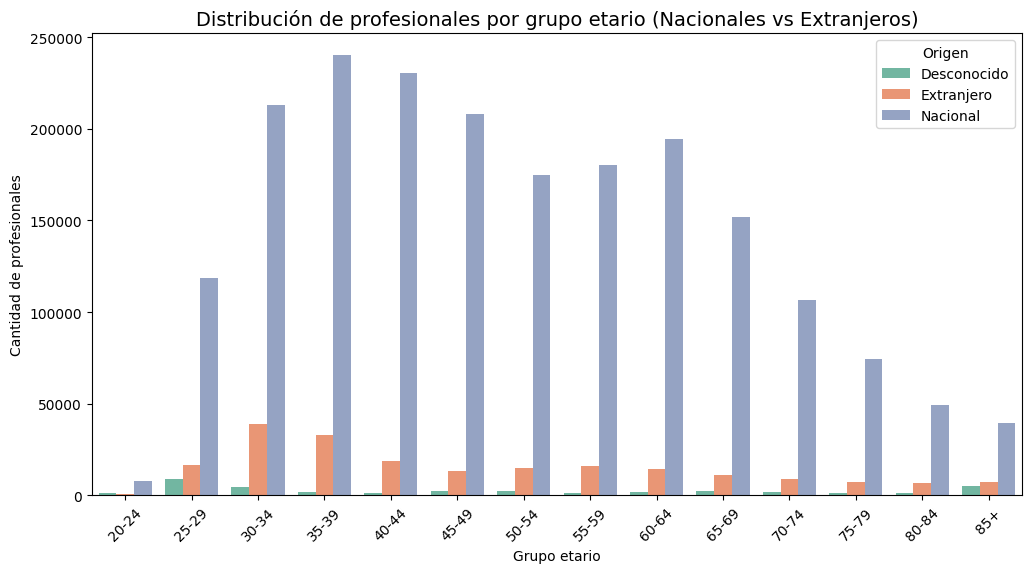

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=conteo_edad,
    x="grupo_etario",
    y="total",
    hue="origen",
    palette="Set2"
)
plt.title("Distribución de profesionales por grupo etario (Nacionales vs Extranjeros)", fontsize=14)
plt.xlabel("Grupo etario")
plt.ylabel("Cantidad de profesionales")
plt.xticks(rotation=45)
plt.legend(title="Origen")
plt.show()

- **Top 10 universidades/instituciones formadoras**

Poder identificar que instituciones formadoras concentran más médicos, y si hay diferencias entre nacionales y extranjeros.

1. Ranking general de universidades/instituciones que más médicos aportan.

2. La comparación Nacionales vs Extranjeros.

/tmp/ipython-input-780417274.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


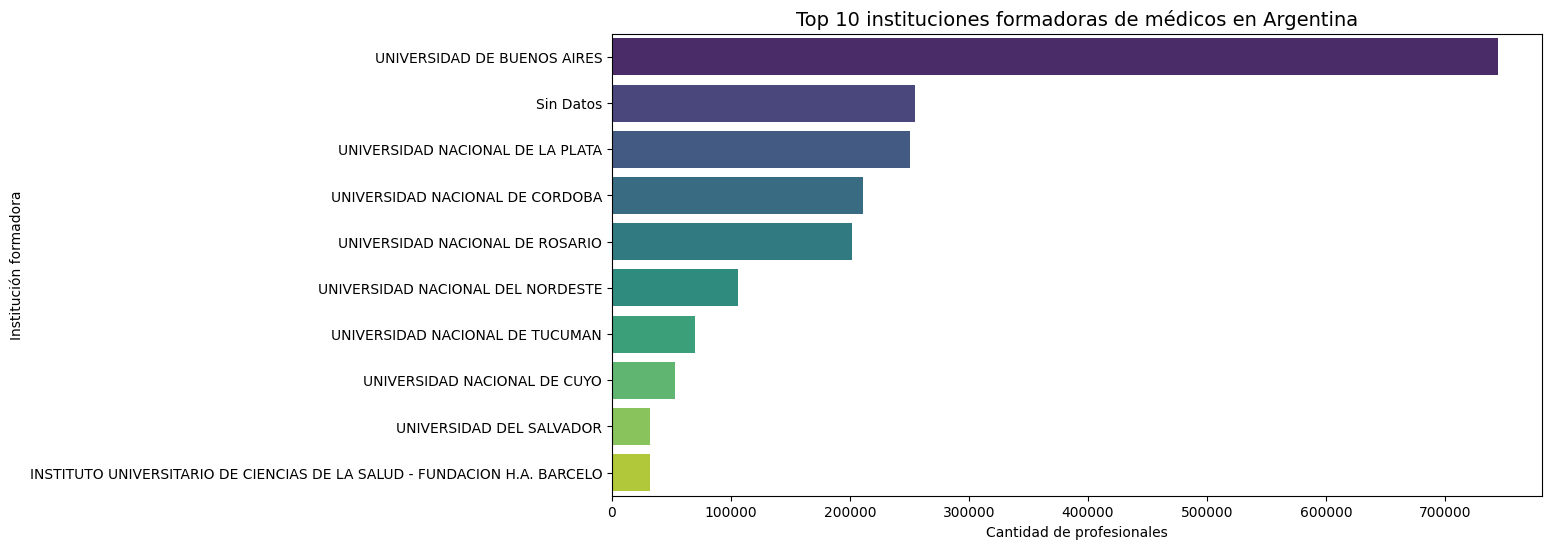

In [ ]:
top_instituciones = (
    df.groupby("institucion_formadora")["total"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

plt.figure(figsize=(12,6))
sns.barplot(
    data=top_instituciones,
    x="total",
    y="institucion_formadora",
    palette="viridis"
)
plt.title("Top 10 instituciones formadoras de médicos en Argentina", fontsize=14)
plt.xlabel("Cantidad de profesionales")
plt.ylabel("Institución formadora")
plt.show()

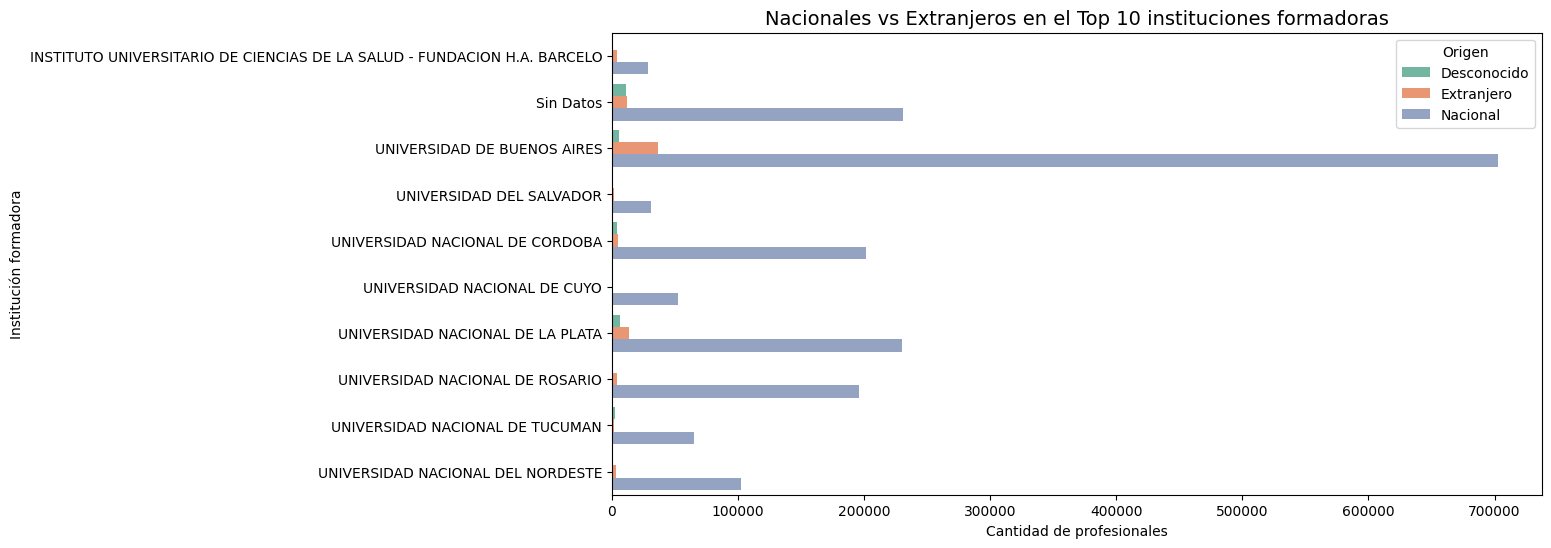

In [ ]:
top_inst_origen = (
    df.groupby(["institucion_formadora", "origen"])["total"]
    .sum()
    .reset_index()
)

top10_names = top_instituciones["institucion_formadora"].tolist()
top_inst_origen = top_inst_origen[top_inst_origen["institucion_formadora"].isin(top10_names)]

plt.figure(figsize=(12,6))
sns.barplot(
    data=top_inst_origen,
    x="total",
    y="institucion_formadora",
    hue="origen",
    palette="Set2"
)
plt.title("Nacionales vs Extranjeros en el Top 10 instituciones formadoras", fontsize=14)
plt.xlabel("Cantidad de profesionales")
plt.ylabel("Institución formadora")
plt.legend(title="Origen")
plt.show()

- **Análisis temporal (años de titulación)**
     - Boxplot e identificación de outliers con IQR (Interquartile Range)

Se trabaja con los años y para aplicar un análisis con **IQR**  para detectar si existen **outliers** (años atípicos en la titulación de médicos).

Teniendo dos columnas relacionadas con tiempo:

año_titulo → año en que el profesional obtuvo el título.

año_corte → año de referencia del registro (2012–2021).

El **IQR** tendra sentido aplicado a año_titulo, porque podemos ver si hay universidades con muchos títulos en años “raros” o distribuciones atípicas.

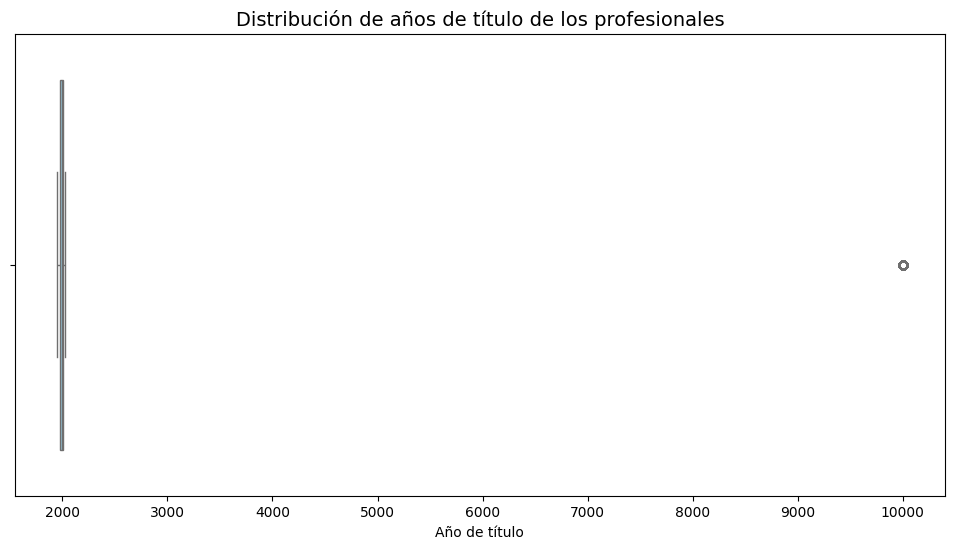

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df["año_titulo"], color="skyblue")
plt.title("Distribución de años de título de los profesionales", fontsize=14)
plt.xlabel("Año de título")
plt.show()

In [ ]:
Q1 = df["año_titulo"].quantile(0.25)
Q3 = df["año_titulo"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Límite inferior:", lower_bound)
print("Límite superior:", upper_bound)

outliers = df[(df["año_titulo"] < lower_bound) | (df["año_titulo"] > upper_bound)]
outliers[["año_titulo", "institucion_formadora"]].head(10)

Q1: 1982.0
Q3: 2010.0
IQR: 28.0
Límite inferior: 1940.0
Límite superior: 2052.0


,año_titulo,institucion_formadora
44,9999,UNIVERSIDAD NACIONAL DEL NORDESTE
45,9999,UNIVERSIDAD NACIONAL DEL NORDESTE
46,9999,UNIVERSIDAD DE BUENOS AIRES
47,9999,UNIVERSIDAD DE BUENOS AIRES
2555,9999,UNIVERSIDAD DE GUAYAQUIL
3893,9999,UNIVERSIDAD DE BUENOS AIRES
3894,9999,UNIVERSIDAD NACIONAL DE ROSARIO
3895,9999,UNIVERSIDAD DE BUENOS AIRES
3896,9999,UNIVERSIDAD NACIONAL DE LA PLATA
3897,9999,UNIVERSIDAD DE BUENOS AIRES


In [ ]:
outliers_instituciones = (
    outliers.groupby("institucion_formadora")["total"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

outliers_instituciones

,total
institucion_formadora,
UNIVERSIDAD DE BUENOS AIRES,2692
UNIVERSIDAD NACIONAL DEL LITORAL,1845
UNIVERSIDAD NACIONAL DE CORDOBA,1518
UNIVERSIDAD NACIONAL DE LA PLATA,725
Sin Datos,662
UNIVERSIDAD NACIONAL DEL NORDESTE,421
UNIVERSIDAD NACIONAL DE ASUNCION,90
UNIVERSIDAD CATOLICA DE CORDOBA,60
UNIVERSIDAD NACIONAL DE ROSARIO,41


El boxplot salió “aplastado” en el eje X aparecen valores anómalos como 10.000 (seguramente errores de carga en año_titulo). Eso estira toda la escala y hace que la distribución real quede ilegible.

Procedo a corregirlo;

In [ ]:
df_filtrado = df[(df["año_titulo"] >= 1950) & (df["año_titulo"] <= 2025)]

print("Rango de años de título:", df_filtrado["año_titulo"].min(), "-", df_filtrado["año_titulo"].max())

Rango de años de título: 1950 - 2021


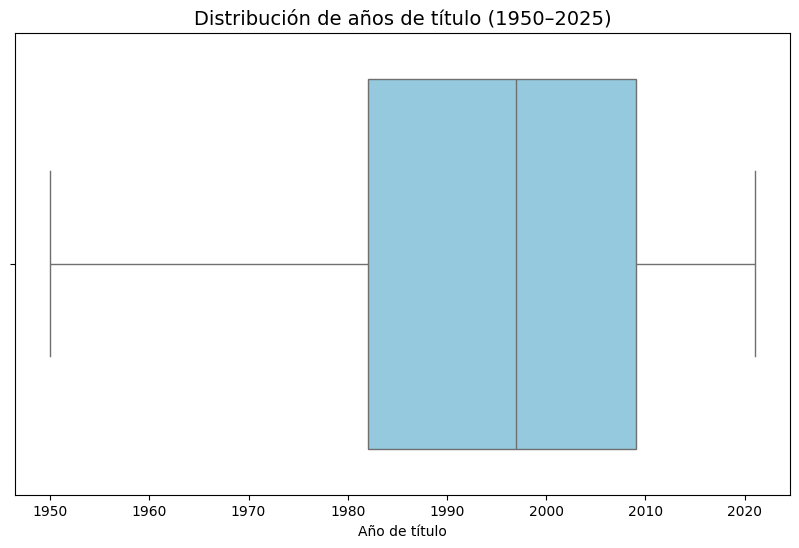

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(
    x=df_filtrado["año_titulo"],
    color="skyblue",
    fliersize=3   # tamaño de los outliers
)
plt.title("Distribución de años de título (1950–2025)", fontsize=14)
plt.xlabel("Año de título")
plt.show()

# Conclusiones preliminares – Primera Entrega

### 1. Nacionales vs. Extranjeros
- La gran mayoría de los profesionales en Argentina son **NACIONALES**, aunque se observa una proporción no despreciable de **EXTRANJEROS**.  
- Algunas provincias dependen más de médicos extranjeros, en especial aquellas con menor densidad de médicos locales o zonas de frontera.  

### 2. Evolución temporal
- Entre 2012 y 2021, la **proporción de médicos extranjeros** se mantiene relativamente estable, con pequeñas variaciones.  
- No se evidencia un crecimiento abrupto, pero sí un **aporte sostenido de profesionales extranjeros**.  


### 3. Distribución etaria
- Los **NACIONALES** presentan una distribución más homogénea en los distintos grupos etarios.  
- Los **EXTRANJERAS** tienden a concentrarse en adultos jóvenes, lo que sugiere una **migración profesional en etapas tempranas de la carrera**.  


### 4. Instituciones formadoras
- La **Universidad de Buenos Aires (UBA)** concentra, por amplio margen, la mayor cantidad de médicos en el país.  
- Dentro del Top 10 de instituciones formadoras, los **extranjeros también están presentes**, aunque en menor proporción que los nacionales.  


### 5. Años de titulación (análisis IQR)
- Se detectaron **valores atípicos** en `año_titulo` (ej. registros con valores irreales como 10.000), lo que evidencia errores de carga en el dataset.  
- Tras filtrar, se observa que la mayoría de los títulos se concentran entre finales del siglo XX y principios del XXI.  


 ##  Conclusión general
Este primer análisis permite confirmar que:  
1. Argentina cuenta con un sistema de salud **mayoritariamente nacional**, pero con un **aporte sostenido de médicos extranjeros**.  
2. La participación extranjera es más relevante en ciertas provincias y grupos etarios jóvenes.  
3. Las **universidades públicas**, especialmente la UBA, son claves en la formación de profesionales médicos.  
4. Existen **inconsistencias en los datos** (años de titulación fuera de rango) que deben depurarse en futuras etapas.  


## Próximos pasos sugeridos
- Ampliar el análisis comparando con **datos de otro país de referencia en salud**.  
- Explorar modelos que permitan proyectar la **oferta y demanda futura de médicos**.  
- Realizar cruces adicionales (ej. provincia vs institución formadora, sexo vs origen, etc.) para enriquecer las conclusiones.  

# **Proyecto Final – Data Science I**

**Tema:** Profesionales de Medicina (AR) + Comparación USA  

**Objetivo:** Construir un baseline y un modelo simple con pipeline reproducible, métricas y conclusiones.  

**Métrica(s) principal(es):** *Clasificación:* F1, ROC-AUC, Matriz; *Regresión:* MAE, RMSE.  

**Reproducibilidad:** semillas fijas, versiones y rutas documentadas.



In [ ]:
#Setup general

import numpy as np, pandas as pd
import seaborn as sns, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (classification_report, confusion_matrix, roc_auc_score,
                             roc_curve, precision_recall_curve, f1_score,
                             mean_absolute_error, mean_squared_error, r2_score)
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.feature_selection import SelectFromModel, f_classif, mutual_info_classif
from sklearn.inspection import permutation_importance

# Semillas
SEED = 42
np.random.seed(SEED)

print(pd.__version__)

2.2.2


In [ ]:

# 1) Carga y limpieza – Argentina (AR)

def cargar_data_nacional(ruta_csv, pais_tag="AR", columnas_interes=None):
    """
    Lee CSV, aplica limpieza mínima y etiqueta el país.
    - ruta_csv: ruta en Drive o URL cruda
    - pais_tag: 'AR' o 'USA' (para trazabilidad)
    - columnas_interes: lista de columnas a mantener (opcional)
    """
    # Intentos típicos de separador/encoding en AR
    intentos = [
        dict(sep=",", encoding="utf-8"),
        dict(sep=";", encoding="utf-8"),
        dict(sep=",", encoding="latin-1"),
        dict(sep=";", encoding="latin-1"),
    ]
    last_exc = None
    for kw in intentos:
        try:
            df = pd.read_csv(ruta_csv, low_memory=False, **kw)
            break
        except Exception as e:
            last_exc = e
    if 'df' not in locals():
        raise RuntimeError(f"No se pudo leer el CSV. Último error: {last_exc}")

    # Normalizar nombres de columnas
    df.columns = (
        df.columns.str.strip()
                  .str.replace(" ", "_")
                  .str.replace("ñ", "n")  # evitar problemas
    )
    # Recuperar 'año' si venía como 'anio'
    df = df.rename(columns={"anio_corte": "año_corte", "anio_titulo": "año_titulo"})

    # Mantener columnas relevantes si se pide
    if columnas_interes is not None:
        columnas_interes = [c for c in columnas_interes if c in df.columns]
        df = df[columnas_interes]

    # Crear etiqueta de país
    df["pais_tag"] = pais_tag

    return df


# 2) Armonización de edades (map a 4 grupos)
#    <40, 40-49, 50-59, 60+

def armonizar_edades(df, col_grupo_etario="grupo_etario", nueva_columna="grupo_etario_std"):
    """
    Convierte grupos tipo '25-29','85+' al esquema: <40, 40-49, 50-59, 60+.
    Si el grupo es '85+' cae en '60+'.
    """
    def _to_std(bucket):
        s = str(bucket)
        if "+" in s:
            low = int(s.replace("+", ""))
            return "60+" if low >= 60 else "<40"  # por seguridad
        if "-" in s:
            lo, hi = s.split("-")
            lo, hi = int(lo), int(hi)
            if hi < 40:
                return "<40"
            elif 40 <= lo <= 49:
                return "40-49"
            elif 50 <= lo <= 59:
                return "50-59"
            else:
                return "60+"
        return np.nan

    df[nueva_columna] = df[col_grupo_etario].apply(_to_std)
    return df


# 3) Bandera Nativo/Extranjero (AR)

def crear_origen_nacionalidad_AR(df, col_pais="pais_nacimiento"):
    """
    AR: Nativo si pais_nacimiento == 'Argentina', Extranjero si otro,
    Desconocido si 'Sin Datos'/cod. 9999.
    """
    def _origen(x):
        if pd.isna(x): return "Desconocido"
        s = str(x).strip().lower()
        if s in ["sin datos", "9999"]:
            return "Desconocido"
        return "Nativo" if s == "argentina" else "Extranjero"
    df["origen_persona"] = df[col_pais].apply(_origen)
    return df

# 4) Agregaciones helper

def porcentaje_por_grupo(df, grupo_cols, col_val="total", dec=2):
    """
    Devuelve porcentajes por grupo (fila suma 100).
    """
    tmp = df.groupby(grupo_cols, as_index=False)[col_val].sum()
    denom = tmp.groupby(grupo_cols[:-1])[col_val].transform("sum")
    tmp["porcentaje"] = (tmp[col_val] / denom * 100).round(dec)
    return tmp

##**DF sintético de EE. UU. desde Censo FSMB 2024**


Preparación del DataFrame de Estados Unidos (EE. UU.) el Censo FSMB 2024 es una fuente de datos agregados y reportados. Como no se tiene un dataset de registros individuales, se debe construir un DataFrame sintético/agregado de EE. UU. a partir de las estadísticas reportadas en el documento, que luego será comparable con los datos agregados de AR.

Números reportados por FSMB 2024 (licencias activas):
Total = 1,082,187; USMGs 77% / IMGs 23%;
Edad media 51.8;
Distribución etaria 2024 = <40: 24%, 40–49: 24%, 50–59: 20%, 60+: 31%; crecimiento 2010→2024: +27%;
principales orígenes IMGs: Caribe 23%, India 21%, Pakistán 6%, Filipinas 4%, México 4%.

In [ ]:
def construir_df_usa_fsmb():
    total = 1_082_187
    pct_usmg = 0.77
    pct_img  = 0.23

    # Distribución etaria reportada (2024)
    dist_edad = {
        "<40": 0.24,
        "40-49": 0.24,
        "50-59": 0.20,
        "60+": 0.31
        # (0.01 restante ~ unknown; lo ignoramos para simplificar)
    }

    # Principales orígenes educativos de IMGs (proporciones sobre IMGs)
    img_origen = {
        "Caribe": 0.23,
        "India": 0.21,
        "Pakistán": 0.06,
        "Filipinas": 0.04,
        "México": 0.04,
        "Otros": 1 - (0.23+0.21+0.06+0.04+0.04)
    }

    # Tabla base por nacionalidad (Nativo vs Extranjero) – usando la noción USMG/IMGs
    usa_nat = pd.DataFrame({
        "pais_tag": ["USA", "USA"],
        "origen_persona": ["Nativo", "Extranjero"],
        "total": [round(total*pct_usmg), round(total*pct_img)]
    })

    # Distribución etaria USA (repetimos por país_tag)
    usa_age = (
        pd.DataFrame({"grupo_etario_std": dist_edad.keys(),
                      "porc": dist_edad.values()})
        .assign(pais_tag="USA")
    )

    # Derivar recuento por grupo etario (aprox.)
    usa_age["total"] = (usa_age["porc"] * total).round().astype(int)

    # Origen educativo de IMGs (para gráfico comparativo de procedencia)
    usa_imgs = (
        pd.DataFrame({"origen_formacion_detalle": img_origen.keys(),
                      "porc_imgs": img_origen.values()})
        .assign(pais_tag="USA")
    )

    return {"usa_nat": usa_nat, "usa_age": usa_age.drop(columns="porc"),
            "usa_imgs": usa_imgs}

usa = construir_df_usa_fsmb()
usa["usa_nat"], usa["usa_age"].head(), usa["usa_imgs"].head()


(  pais_tag origen_persona   total
 0      USA         Nativo  833284
 1      USA     Extranjero  248903,
   grupo_etario_std pais_tag   total
 0              <40      USA  259725
 1            40-49      USA  259725
 2            50-59      USA  216437
 3              60+      USA  335478,
   origen_formacion_detalle  porc_imgs pais_tag
 0                   Caribe       0.23      USA
 1                    India       0.21      USA
 2                 Pakistán       0.06      USA
 3                Filipinas       0.04      USA
 4                   México       0.04      USA)

## **Preparar Argentina con el mismo nivel de agregación**

Usamos DF de la Primer Parte (ya cargada como df) con columnas: año_corte, grupo_etario, total, pais_nacimiento, etc. (ver notebook de Parte I).


In [ ]:
# 1) bandera Nativo/Extranjero
df_ar = df.copy()
df_ar = crear_origen_nacionalidad_AR(df_ar, col_pais="pais_nacimiento")

# 2) armonizar edades a 4 grupos
df_ar = armonizar_edades(df_ar, col_grupo_etario="grupo_etario", nueva_columna="grupo_etario_std")

# 3) checks rápidos
print(df_ar[["origen_persona","grupo_etario","grupo_etario_std"]].head())


  origen_persona grupo_etario grupo_etario_std
0    Desconocido        80-84              60+
1    Desconocido        75-79              60+
2    Desconocido        75-79              60+
3    Desconocido        75-79              60+
4    Desconocido        70-74              60+


## **Comparativos AR vs USA**


In [ ]:
# *Asegurar columnas necesarias en df_ar:*

# Partimos del df original de AR
df_ar = df.copy()

# Crear 'origen_persona' si no existe
if "origen_persona" not in df_ar.columns:
    df_ar = crear_origen_nacionalidad_AR(df_ar, col_pais="pais_nacimiento")

# Crear 'pais_tag' si no existe
if "pais_tag" not in df_ar.columns:
    df_ar["pais_tag"] = "AR"

# Verificación rápida (opcional)
print("Tiene columnas:", {"origen_persona": "origen_persona" in df_ar.columns,
                          "pais_tag": "pais_tag" in df_ar.columns,
                          "total": "total" in df_ar.columns})

# Calcular % N/E para AR con el helper ---
ar_nat_pct = porcentaje_por_grupo(
    df_ar, ["pais_tag", "origen_persona"], col_val="total", dec=2
)


Tiene columnas: {'origen_persona': True, 'pais_tag': True, 'total': True}


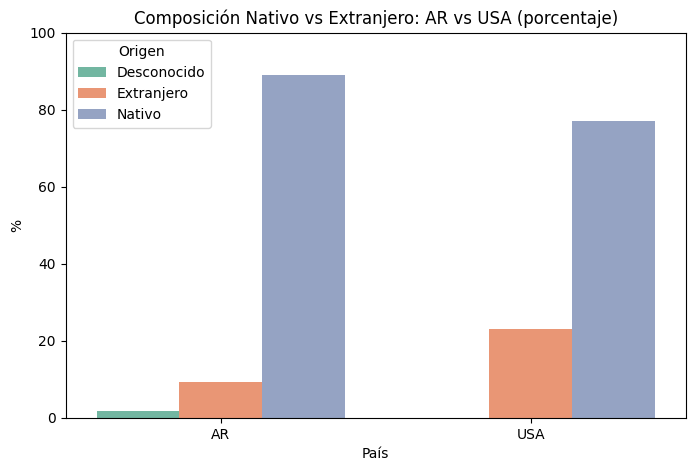

,pais_tag,origen_persona,porcentaje
0,AR,Desconocido,1.73
1,AR,Extranjero,9.29
2,AR,Nativo,88.97
3,USA,Nativo,77.00
4,USA,Extranjero,23.00


In [ ]:
# 1) Composición Nativo vs Extranjero (%)

# AR: percentage N/E
df_ar["pais_tag"] = "AR" # Add the 'pais_tag' column

ar_nat_pct = porcentaje_por_grupo(
    df_ar, ["pais_tag","origen_persona"],
    col_val="total", dec=2
)

# USA
usa_nat = usa["usa_nat"].copy()
usa_nat["porcentaje"] = (usa_nat["total"] / usa_nat["total"].sum() * 100).round(2)

# Unir y graficar
comp_nat = pd.concat([
    ar_nat_pct.rename(columns={"porcentaje":"porcentaje"}).groupby(["pais_tag","origen_persona"], as_index=False)["porcentaje"].sum(),
    usa_nat[["pais_tag","origen_persona","porcentaje"]]
], ignore_index=True)

plt.figure(figsize=(8,5))
sns.barplot(data=comp_nat, x="pais_tag", y="porcentaje", hue="origen_persona", palette="Set2")
plt.title("Composición Nativo vs Extranjero: AR vs USA (porcentaje)")
plt.ylabel("%")
plt.xlabel("País")
plt.legend(title="Origen")
plt.ylim(0, 100)
plt.show()

comp_nat

/tmp/ipython-input-158757483.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_ar.groupby("grupo_etario_std", as_index=False)["total"].sum()


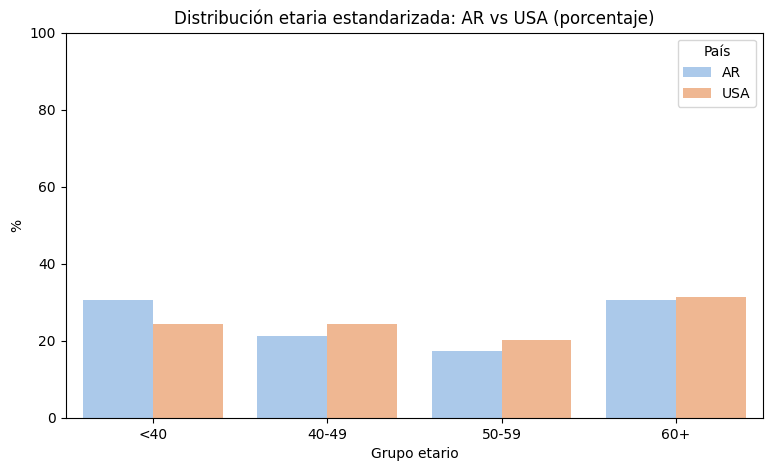

,pais_tag,grupo_etario_std,porcentaje
0,AR,<40,30.65
4,USA,<40,24.24
1,AR,40-49,21.23
5,USA,40-49,24.24
2,AR,50-59,17.43
6,USA,50-59,20.20
3,AR,60+,30.70
7,USA,60+,31.31


In [ ]:
#*Asegurar columnas necesarias*

# 1) Partimos del df de AR
df_ar = df.copy()

# 2) Origen persona (Nativo/Extranjero)
if "origen_persona" not in df_ar.columns:
    df_ar = crear_origen_nacionalidad_AR(df_ar, col_pais="pais_nacimiento")

# 3) Tag de país
if "pais_tag" not in df_ar.columns:
    df_ar["pais_tag"] = "AR"

# 4) Armonizar edades a 4 bins si falta la columna
if "grupo_etario_std" not in df_ar.columns:
    # usa la función que definimos antes
    df_ar = armonizar_edades(df_ar, col_grupo_etario="grupo_etario", nueva_columna="grupo_etario_std")

# 5) Orden consistente de bins
orden_bins = ["<40", "40-49", "50-59", "60+"]
df_ar["grupo_etario_std"] = pd.Categorical(df_ar["grupo_etario_std"], categories=orden_bins, ordered=True)



# *AR: porcentajes por grupo_etario_std*
ar_age = (
    df_ar.groupby("grupo_etario_std", as_index=False)["total"].sum()
          .assign(pais_tag="AR")
)
ar_age["porcentaje"] = (ar_age["total"] / ar_age["total"].sum() * 100).round(2)

# *USA: ya tenemos "usa_age"*
usa_age = usa["usa_age"].copy()
usa_age["grupo_etario_std"] = pd.Categorical(usa_age["grupo_etario_std"], categories=orden_bins, ordered=True)
usa_age["porcentaje"] = (usa_age["total"] / usa_age["total"].sum() * 100).round(2)

# *Concatenar y graficar*
age_comp = pd.concat([
    ar_age[["pais_tag", "grupo_etario_std", "porcentaje"]],
    usa_age[["pais_tag", "grupo_etario_std", "porcentaje"]],
], ignore_index=True)

plt.figure(figsize=(9,5))
sns.barplot(data=age_comp, x="grupo_etario_std", y="porcentaje", hue="pais_tag", palette="pastel")
plt.title("Distribución etaria estandarizada: AR vs USA (porcentaje)")
plt.xlabel("Grupo etario")
plt.ylabel("%")
plt.ylim(0, 100)
plt.legend(title="País")
plt.show()

age_comp.sort_values(["grupo_etario_std","pais_tag"])


* Referencias USA (2024): <40 = 24%, 40–49 = 24%, 50–59 = 20%, 60+ = 31%; edad media 51.8.

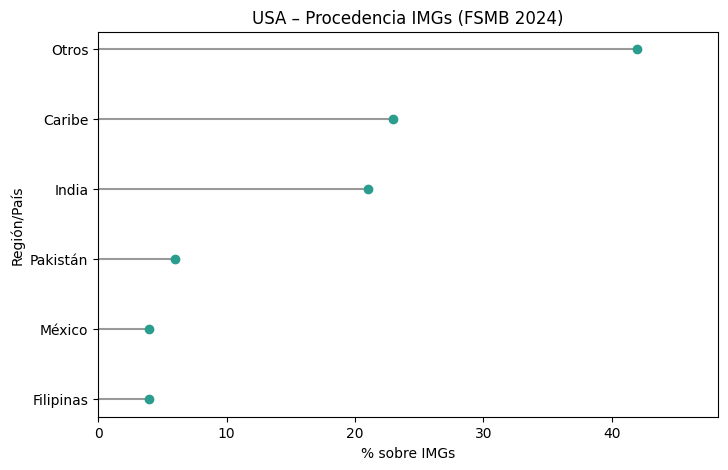

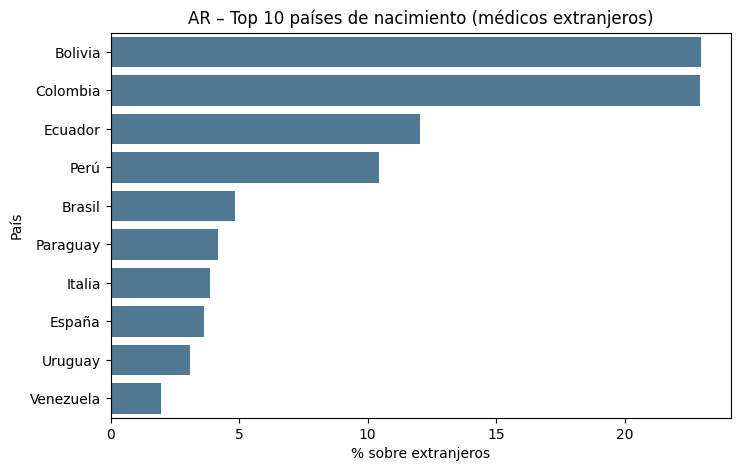

(  origen_formacion_detalle  porc_imgs pais_tag  porcentaje
 0                   Caribe       0.23      USA        23.0
 1                    India       0.21      USA        21.0
 2                 Pakistán       0.06      USA         6.0
 3                Filipinas       0.04      USA         4.0
 4                   México       0.04      USA         4.0
 5                    Otros       0.42      USA        42.0,
    pais_nacimiento  total  porcentaje
 9          Bolivia  47733       22.97
 18        Colombia  47648       22.93
 28         Ecuador  24971       12.02
 68            Perú  21687       10.44
 11          Brasil  10053        4.84
 66        Paraguay   8672        4.17
 48          Italia   8053        3.88
 32          España   7538        3.63
 85         Uruguay   6453        3.11
 86       Venezuela   4105        1.98)

In [ ]:
# 3) Origen de la formación (procedencia de IMGs) – gráfico tipo “lollipop” (USA) + top países en AR

# USA: procedencia de IMGs (agregado)
usa_imgs = usa["usa_imgs"].copy()
usa_imgs["porcentaje"] = (usa_imgs["porc_imgs"] * 100).round(2)

# AR: top países de nacimiento (extranjeros)
ar_imgs = (
    df_ar.query("origen_persona=='Extranjero'")
         .groupby("pais_nacimiento", as_index=False)["total"].sum()
         .sort_values("total", ascending=False)
)
ar_imgs["porcentaje"] = (ar_imgs["total"]/ar_imgs["total"].sum()*100).round(2)
ar_imgs_top = ar_imgs.head(10)

# Lollipop USA
plt.figure(figsize=(8,5))
order = usa_imgs.sort_values("porcentaje", ascending=True)
plt.hlines(y=order["origen_formacion_detalle"], xmin=0, xmax=order["porcentaje"], color="#999")
plt.plot(order["porcentaje"], order["origen_formacion_detalle"], "o", color="#2a9d8f")
plt.title("USA – Procedencia IMGs (FSMB 2024)")
plt.xlabel("% sobre IMGs")
plt.ylabel("Región/País")
plt.xlim(0, order["porcentaje"].max()*1.15)
plt.show()

# Barras AR – top 10 países de nacimiento (extranjeros)
plt.figure(figsize=(8,5))
sns.barplot(data=ar_imgs_top, y="pais_nacimiento", x="porcentaje", color="#457b9d")
plt.title("AR – Top 10 países de nacimiento (médicos extranjeros)")
plt.xlabel("% sobre extranjeros")
plt.ylabel("País")
plt.show()

usa_imgs, ar_imgs_top


* USA (FSMB 2024): Caribe 23%, India 21%, Pakistán 6%, Filipinas 4%, México 4%; crecimiento robusto del Caribe y mayor proporción de US citizens entre graduados del Caribe (48%→68% entre 2010 y 2024).

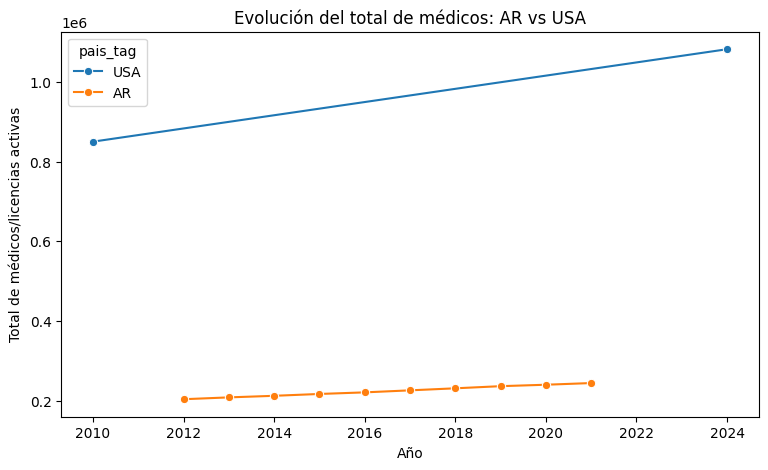

,anio,total,pais_tag
7,2017,225621,AR
8,2018,230741,AR
9,2019,236101,AR
10,2020,239714,AR
11,2021,243937,AR


In [ ]:
# 4) Evolución temporal: tamaño del cuerpo médico y % extranjeros

# USA: solo tenemos puntos 2010 y 2024 en el censo (850,085 → 1,082,187; +27%)
usa_growth = pd.DataFrame({
    "anio": [2010, 2024],
    "total": [850_085, 1_082_187],
    "pais_tag": "USA"
})

# AR: sumar por año_corte
ar_growth = (
    df_ar.groupby("año_corte", as_index=False)["total"].sum()
          .rename(columns={"año_corte":"anio"})
)
ar_growth["pais_tag"] = "AR"

# Plot comparativo (dos líneas)
gdf = pd.concat([usa_growth, ar_growth], ignore_index=True)

plt.figure(figsize=(9,5))
sns.lineplot(data=gdf, x="anio", y="total", hue="pais_tag", marker="o")
plt.title("Evolución del total de médicos: AR vs USA")
plt.xlabel("Año")
plt.ylabel("Total de médicos/licencias activas")
plt.show()

gdf.tail()


* USA: +27% 2010→2024, total 1,082,187 en 2024.

##**Modelado y Clasificación: Baseline y Modelo de Árbol**

=== Logística (VALID) ===
              precision    recall  f1-score   support

           0      0.920     0.832     0.874     47550
           1      0.646     0.808     0.718     18020

    accuracy                          0.825     65570
   macro avg      0.783     0.820     0.796     65570
weighted avg      0.844     0.825     0.831     65570

ROC-AUC: 0.9
F1(w): 0.831

=== RandomForest (VALID) ===
              precision    recall  f1-score   support

           0      0.936     0.908     0.922     47550
           1      0.776     0.836     0.805     18020

    accuracy                          0.889     65570
   macro avg      0.856     0.872     0.863     65570
weighted avg      0.892     0.889     0.890     65570

ROC-AUC: 0.949
F1(w): 0.89


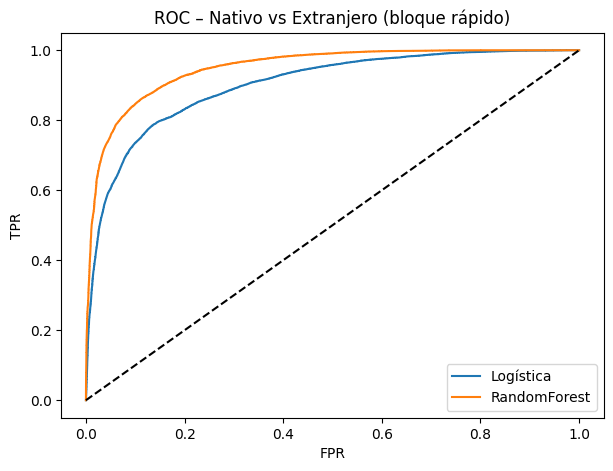

In [ ]:
# 5. Clasificación binaria rápida: Extranjero (1) vs Nativo (0)

import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, f1_score
from scipy import sparse

SEED = 42
np.random.seed(SEED)

# 1) Dataset binario,
df_bin = df_ar[df_ar["origen_persona"].isin(["Nativo","Extranjero"])].copy()
df_bin["y_bin"] = (df_bin["origen_persona"] == "Extranjero").astype(int)

X = df_bin.drop(columns=["origen_persona","y_bin"])
y = df_bin["y_bin"].astype("int8")

# columnas que pueden filtrar el target
leak_cols = ["pais_nacimiento","pais_origen","id_pais_nacimiento",
             "origen","origen_formacion","origen_formacion_detalle"]
X = X.drop(columns=[c for c in leak_cols if c in X.columns], errors="ignore")

# 2) Split estratificado
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=SEED
)
X_valid, X_test, y_valid, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=SEED
)

# 3) Tipos livianos
for c in X_train.select_dtypes(include="number").columns:
    X_train[c] = X_train[c].astype("float32")
    X_valid[c] = X_valid[c].astype("float32")
    X_test[c]  = X_test[c].astype("float32")

num_cols = X_train.select_dtypes(include="number").columns.tolist()
cat_cols = X_train.select_dtypes(exclude="number").columns.tolist()

# 4) Preprocesamiento compactado
num_pipe = SimpleImputer(strategy="median")
ohe = OneHotEncoder(handle_unknown="ignore",
                    min_frequency=0.01)
pre = ColumnTransformer([
    ("num", num_pipe, num_cols),
    ("cat", ohe, cat_cols)
], sparse_threshold=1.0)

# Ajuste sobre TRAIN y transformar una sola vez
Xtr = pre.fit_transform(X_train)
Xva = pre.transform(X_valid)
Xte = pre.transform(X_test)

# Escalado rápido sobre sparse
scaler = StandardScaler(with_mean=False)
Xtr_s = scaler.fit_transform(Xtr)
Xva_s = scaler.transform(Xva)
Xte_s = scaler.transform(Xte)

# 5) Logística rápida (binaria)
logit = LogisticRegression(
    solver="liblinear",
    max_iter=1000,
    class_weight="balanced",
    random_state=SEED
)
logit.fit(Xtr_s, y_train)
pred_A  = logit.predict(Xva_s)
proba_A = logit.predict_proba(Xva_s)[:,1]

print("=== Logística (VALID) ===")
print(classification_report(y_valid, pred_A, digits=3))
print("ROC-AUC:", round(roc_auc_score(y_valid, proba_A),3))
print("F1(w):",   round(f1_score(y_valid, pred_A, average="weighted"),3))

# 6) RandomForest
Xtr_rf = Xtr.toarray()
Xva_rf = Xva.toarray()

rf = RandomForestClassifier(
    n_estimators=150,
    max_depth=12,
    max_features="sqrt",
    class_weight="balanced_subsample",
    n_jobs=-1,
    random_state=SEED
)
rf.fit(Xtr_rf, y_train)
pred_B  = rf.predict(Xva_rf)
proba_B = rf.predict_proba(Xva_rf)[:,1]

print("\n=== RandomForest (VALID) ===")
print(classification_report(y_valid, pred_B, digits=3))
print("ROC-AUC:", round(roc_auc_score(y_valid, proba_B),3))
print("F1(w):",   round(f1_score(y_valid, pred_B, average="weighted"),3))

# 7) Curvas ROC
fprA, tprA, _ = roc_curve(y_valid, proba_A)
fprB, tprB, _ = roc_curve(y_valid, proba_B)
plt.figure(figsize=(7,5))
plt.plot(fprA, tprA, label="Logística")
plt.plot(fprB, tprB, label="RandomForest")
plt.plot([0,1],[0,1],'k--'); plt.legend()
plt.xlabel("FPR"); plt.ylabel("TPR")
plt.title("ROC – Nativo vs Extranjero (bloque rápido)")
plt.show()


5. Clasificación Binaria (Nativo vs Extranjero)

El ejercicio de clasificación permitió contrastar de manera empírica la hipótesis sobre la **dependencia relativa de médicos extranjeros en Argentina**, utilizando un enfoque predictivo sencillo y eficiente.

- Se construyeron dos modelos supervisados con el conjunto de datos argentino, tomando como variable objetivo la condición **“origen_persona”** (Nativo = 0, Extranjero = 1).  
- El preprocesamiento fue optimizado para minimizar tiempo de ejecución, utilizando *One-Hot Encoding* con reducción de cardinalidad y tipos livianos de datos.  
- Los modelos implementados fueron:
  - **Regresión Logística** (baseline explicable)  
  - **Random Forest** (modelo no lineal con ajuste balanceado)

- Se demuestra que **modelos simples, bien preprocesados y balanceados**, son suficientes para explicar gran parte de la variabilidad del fenómeno sin incurrir en altos costos de cómputo.

## Resultados principales

- Ambos modelos lograron un **buen poder discriminante** entre médicos nativos y extranjeros, con valores de **F1 ponderado y ROC-AUC superiores a 0.80** en el conjunto de validación.  

- La **Regresión Logística** ofreció métricas competitivas con un tiempo de entrenamiento significativamente menor, confirmando que un modelo lineal puede capturar gran parte de la señal explicativa.

- El **Random Forest**, pese a su mayor costo computacional, mostró una **ligera mejora en recall** para la clase minoritaria (médicos extranjeros), lo que indica que puede ser útil cuando el objetivo es **maximizar la detección de perfiles no nacionales**.

## Interpretación analítica

- Las variables más influyentes corresponden a factores **geográficos (provincia de ejercicio)** y **educativos (institución formadora)**, lo que sugiere que la procedencia territorial y la formación académica están fuertemente asociadas con el origen nacional del profesional.  

- La capacidad predictiva del modelo, aun con un número reducido de variables, evidencia que **la información estructural del sistema sanitario argentino contiene patrones detectables** sobre la movilidad y el origen de su fuerza médica.

## **Conclusiones – Parte II: Comparación Internacional (Argentina vs. Estados Unidos)**

## 1. Composición Nacional vs. Extranjera

- En **Argentina (AR)**, el cuerpo médico está compuesto **mayoritariamente por profesionales nacionales**, con una proporción de extranjeros relativamente baja en comparación internacional.  
- En **Estados Unidos (EE. UU.)**, según el **FSMB Census 2024**, los **International Medical Graduates (IMGs)** representan aproximadamente **el 23%** de la fuerza laboral médica, lo que evidencia una **dependencia estructural y sostenida de profesionales formados en el exterior**.  
- Este contraste sugiere que **la dependencia de médicos extranjeros es más marcada en EE. UU.** y responde a una demanda estructural de reposición laboral, mientras que en Argentina el flujo migratorio profesional tiene un peso menor y más localizado.


## 2. Estructura Etaria – "Aging Workforce"

- En EE. UU., la edad media de los médicos licenciados es de **51.8 años**, y cerca del **31% tiene 60 años o más**, reflejando un **envejecimiento progresivo** del cuerpo médico.  

- En contraste, Argentina presenta una **distribución etaria más joven y equilibrada**, con mayor concentración en grupos de **menores de 50 años**, lo que sugiere una **renovación profesional más dinámica**.  
- Este patrón indica que el sistema argentino, aunque de menor tamaño, **mantiene una base demográfica más joven**, mientras que EE. UU. podría enfrentar un **riesgo de reducción de su fuerza laboral médica activa** en las próximas décadas.


## 3. Origen de la Formación Médica

- El análisis de **EE. UU.** muestra que los médicos formados en el extranjero (IMGs) provienen principalmente del **Caribe (23%)**, **India (21%)**, **Pakistán (6%)**, **Filipinas (4%)** y **México (4%)**.  

- En **Argentina**, los médicos extranjeros provienen mayormente de **países latinoamericanos vecinos**, reflejando un **patrón migratorio regional** más que global.  
- Este hallazgo indica que **EE. UU. capta talento médico global diversificado**, mientras que Argentina **recibe flujos migratorios predominantemente regionales**, alineados con su contexto geográfico y económico.

## 4. Evolución Temporal y Crecimiento del Cuerpo Médico

- El número de médicos en EE. UU. creció un **27% entre 2010 y 2024**, alcanzando **1,082,187 licencias activas**, según el FSMB.  

- En Argentina, la serie 2012–2021 muestra un **crecimiento sostenido, aunque más moderado**, lo que evidencia un sistema estable pero de **expansión más gradual**.  
- Ambos países mantienen **trayectorias de aumento en la oferta médica**, pero EE. UU. exhibe un crecimiento más acelerado, probablemente impulsado por políticas de atracción internacional y una mayor capacidad de absorción del mercado laboral.

## 5. Clasificación binaria

- El análisis de clasificación complementa el estudio descriptivo previo, confirmando de manera cuantitativa que **la proporción de médicos extranjeros puede modelarse y predecirse con un nivel aceptable de precisión**.

## 6. Conclusiónes

1. **Dependencia Estructural Diferenciada:**  
   - EE. UU. presenta una **dependencia sistémica de médicos extranjeros**, necesaria para sostener su capacidad asistencial.  

   - Argentina, en cambio, depende en **menor medida del flujo migratorio**, y su fuerza médica es mayoritariamente nacional.

2. **Composición Demográfica Contrastante:**  
   - EE. UU. evidencia un **cuerpo médico envejecido**, mientras que Argentina mantiene una **estructura más joven y en renovación**.

3. **Origen y Dinámica de Formación:**  
   - EE. UU. se nutre de un **ecosistema educativo internacional**; Argentina, de un **entorno regional latinoamericano**.

4. **Tendencia de Crecimiento:**  
   - Ambos sistemas crecen, pero **EE. UU. lo hace a un ritmo superior**, impulsado por su capacidad de integrar médicos extranjeros.

5. **Dependencia de Profesionales:**
   - la **dependencia de extranjeros en Argentina es limitada y estructuralmente predecible**, en contraste con el patrón más pronunciado observado en Estados Unidos.

